In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from yellowbrick.cluster import silhouette_visualizer
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.signal import savgol_filter
import hdbscan
from tqdm import tqdm
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan

In [2]:
data = pd.read_csv('Run200_Wave_0_1.txt',  sep=' ', header=None, skipinitialspace=True)
pd.set_option('display.max_columns', None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504
0,2890276,357,113,500,14820,14823,14824,14822,14818,14820,14824,14822,14820,14820,14820,14822,14824,14820,14828,14819,14822,14822,14820,14822,14820,14819,14820,14821,14815,14830,14824,14825,14820,14820,14824,14822,14817,14825,14820,14814,14822,14823,14824,14820,14820,14823,14822,14817,14824,14826,14823,14822,14818,14822,14820,14817,14820,14821,14822,14820,14818,14820,14820,14825,14818,14819,14824,14822,14818,14820,14827,14826,14824,14819,14820,14822,14820,14820,14822,14825,14822,14821,14817,14822,14819,14821,14823,14821,14817,14820,14827,14820,14820,14823,14820,14815,14820,14822,14820,14824,14817,14818,14819,14822,14819,14818,14827,14820,14818,14820,14819,14818,14820,14824,14822,14820,14817,14822,14820,14817,14824,14822,14823,14824,14820,14825,14818,14823,14817,14820,14824,14824,14815,14820,14820,14822,14817,14822,14820,14820,14820,14822,14820,14819,14818,14823,14818,14818,14820,14814,14763,14563,14378,14291,14378,14460,14532,14607,14630,14681,14732,14741,14748,14756,14772,14779,14790,14792,14799,14801,14799,14797,14792,14803,14798,14794,14794,14814,14808,14811,14810,14807,14815,14810,14807,14801,14804,14804,14801,14801,14810,14806,14791,14813,14799,14802,14804,14811,14812,14803,14803,14812,14816,14819,14812,14809,14817,14817,14815,14817,14820,14817,14812,14816,14819,14816,14815,14822,14806,14817,14809,14813,14810,14813,14812,14819,14812,14815,14812,14823,14810,14810,14819,14819,14822,14813,14816,14820,14816,14817,14820,14819,14817,14821,14820,14826,14819,14820,14820,14826,14819,14821,14812,14820,14817,14813,14812,14815,14815,14814,14817,14817,14817,14815,14814,14820,14815,14813,14810,14820,14822,14821,14818,14818,14819,14820,14812,14818,14820,14816,14818,14819,14817,14819,14820,14816,14817,14816,14819,14819,14818,14818,14817,14820,14818,14824,14823,14813,14817,14818,14815,14825,14819,14827,14818,14815,14820,14823,14815,14822,14827,14822,14818,14818,14818,14822,14812,14830,14819,14817,14823,14828,14824,14810,14817,14827,14823,14814,14820,14821,14820,14816,14818,14828,14818,14822,14819,14823,14817,14816,14824,14822,14823,14818,14822,14825,14820,14823,148

In [3]:
df = data.copy()
df.shape

(23479, 505)

In [4]:
# Находим столбцы, в которых есть пустые строки
null_columns = df.isnull().sum()
print(null_columns[null_columns > 0])

504    23479
dtype: int64


In [6]:
#Дублей нет
df.duplicated().sum()

0

In [15]:
# Обрабатываетмодномерный сигнал, выполняя несколько этапов очистки и нормализации
def prep_signal(input_array, filter_window=11, poly_order=2):
    # Заменяем отсутствующие значения на нули
    cleaned = np.where(np.isnan(input_array), 0.0, input_array)

    # Вычитаем фоновый уровень, оцененный как медиана первых 50 значений
    background_level = np.median(cleaned[:50])
    adjusted = cleaned - background_level

    # Проверка инверсии сигнала: если отрицательная часть преобладает — инвертируем
    if np.abs(np.min(adjusted)) > np.max(adjusted):
        adjusted *= -1

    # Применяем сглаживание
    smoothed = savgol_filter(adjusted, window_length=filter_window, polyorder=poly_order)

    # Масштабируем по максимуму, если он положителен
    peak = np.max(smoothed)
    if peak > 0:
        signal = smoothed / peak
    else:
        signal = np.zeros_like(smoothed)
    return signal


In [16]:
def signal_features(signal):
    signal = prep_signal(signal)

    peak = np.max(signal)
    peak_idx = np.argmax(signal)
    energy = np.sum(signal)

    # PSD — отношение площади в первых 50 отсчетах к полной площади
    fast_area = np.sum(signal[:50])
    psd = fast_area / (energy + 1e-6)

    # Время спада: когда сигнал опускается ниже 10% после пика
    try:
        fall_time = np.where(signal[peak_idx:] < 0.1)[0][0]
    except:
        fall_time = 0

    return [peak, energy, psd, fall_time]


Text(0, 0.5, 'bit ADC')

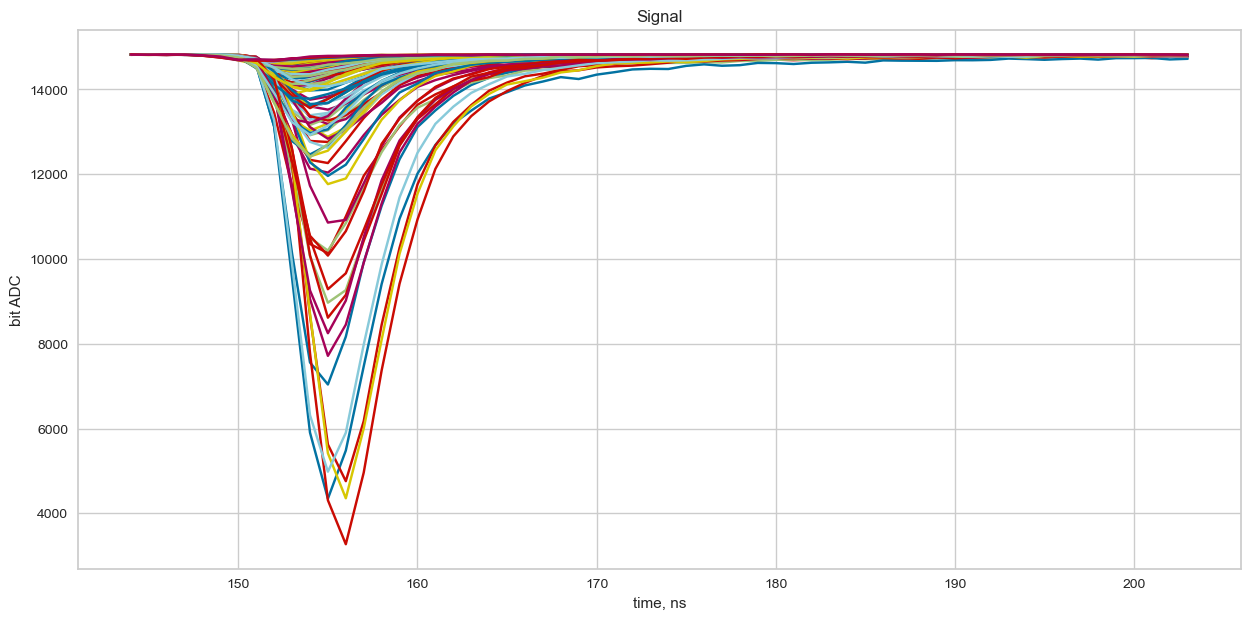

In [17]:
N=range(0,100)
ax = df.T[N][140:200].plot(title='Signal' ,legend=None,figsize=(15,7))
ax.set_xlabel("time, ns")
ax.set_ylabel("bit ADC")

In [13]:
# Удалим малоинформативные столбы
df = df.drop(columns=[0,1,2,3, 504])

In [18]:
features = df.apply(signal_features, axis=1, result_type='expand')
features.columns = ['peak', 'energy', 'psd', 'fall_time']

In [19]:
# Стандартизируем данные для того, чтобы привести их к одному формату
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
scaled_data =  pd.DataFrame(scaled_data)

In [20]:
# Создаем объект PCA с указанным количеством главных компонент
pca = PCA(n_components=2)
component = pca.fit_transform(scaled_data)
pca_data =  pd.DataFrame(component)

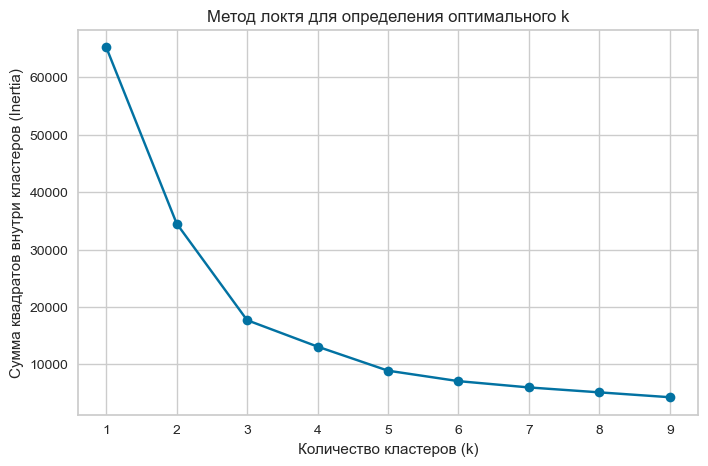

In [23]:
#Метод локтя
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Построим график
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Сумма квадратов внутри кластеров (Inertia)')
plt.title('Метод локтя для определения оптимального k')
plt.grid(True)
plt.show()

Silhouette Score для k=2: 0.6372
Silhouette Score для k=3: 0.6390
Silhouette Score для k=4: 0.5943


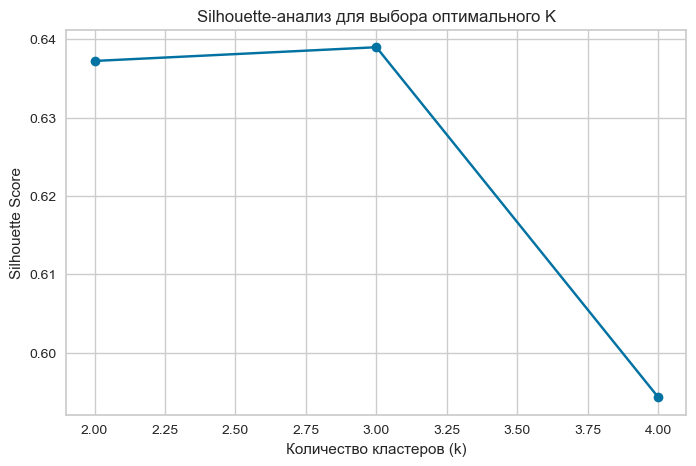

In [24]:
# Силуэтный анализ

scores = []
k_range = range(2, 5)

for k in k_range:
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = model.fit_predict(pca_data)
    score = silhouette_score(pca_data, labels)
    scores.append(score)
    print(f"Silhouette Score для k={k}: {score:.4f}")

# Визуализация
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, 'bo-')
plt.xlabel("Количество кластеров (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette-анализ для выбора оптимального K")
plt.grid(True)
plt.show()

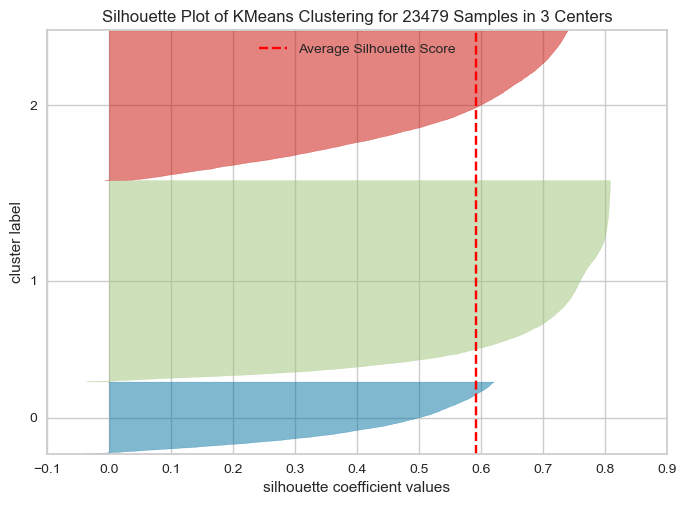

CPU times: total: 26.9 s
Wall time: 8.8 s


SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 23479 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

In [25]:
%%time

silhouette_visualizer(KMeans(3, random_state=42), pca_data, colors='yellowbrick')

In [26]:
kmeans = KMeans(n_clusters=3, n_init=10, random_state = 42)

cluster_labels = kmeans.fit_predict(pca_data)

In [27]:
features_kmeans = features.copy()

In [28]:
features_kmeans['cluster'] = cluster_labels

In [29]:
predictions = pd.DataFrame(features_kmeans, columns=['cluster'])
predictions = predictions.reset_index()

predictions['cluster'].value_counts()

cluster
0    12334
1    11143
2        2
Name: count, dtype: int64

In [30]:
unique_values = predictions['cluster'].unique()
activity_map = {int(val): idx + 1 for idx, val in enumerate((unique_values))}

activity_map

{1: 1, 0: 2, 2: 3}

In [31]:
predictions['cluster'] = predictions['cluster'].map(activity_map)

In [34]:
submit = predictions.copy()
submit = submit.rename(columns={'index': 'Index'})
submit.to_csv('submit_K-Means.csv', index=False)

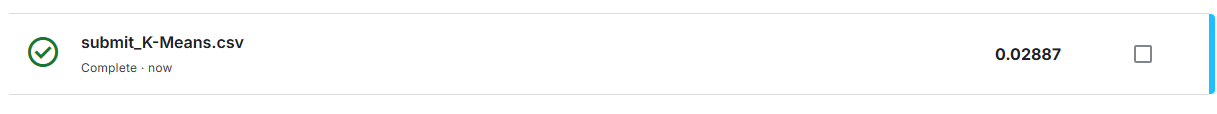

In [35]:
features_GMM = df.apply(signal_features, axis=1, result_type='expand')
features_GMM.columns = ['peak', 'energy', 'psd', 'fall_time']

In [36]:
# Масштабирование и PCA
scaler = StandardScaler()
scaled = scaler.fit_transform(features_GMM)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled)

In [37]:
gmm = GaussianMixture(n_components=3, covariance_type='tied', random_state=42, init_params="random", max_iter=200, reg_covar=1e-4)
gmm_labels = gmm.fit_predict(pca_data)

features_GMM['cluster'] = gmm_labels

In [38]:
predictions = pd.DataFrame(features_GMM, columns=['cluster'])
predictions = predictions.reset_index()

predictions['cluster'].value_counts()

cluster
0    18351
2     3591
1     1537
Name: count, dtype: int64

In [39]:
unique_values = predictions['cluster'].unique()
activity_map = {int(val): idx + 1 for idx, val in enumerate((unique_values))}

activity_map

{0: 1, 1: 2, 2: 3}

In [40]:
predictions['cluster'] = predictions['cluster'].map(activity_map)

In [41]:
submit = predictions.copy()
submit = submit.rename(columns={'index': 'Index'})
submit.to_csv('submit_GMM.csv', index=False)

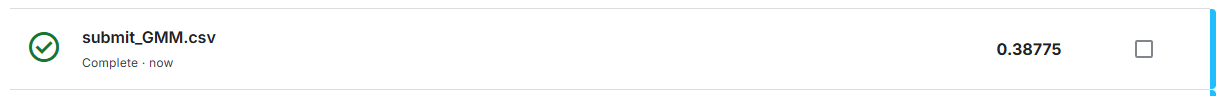

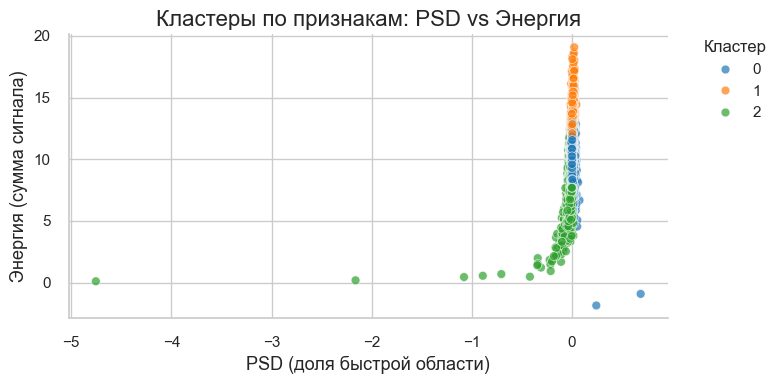

In [42]:
# Размер графика
plt.figure(figsize=(8, 4))

scatter = sns.scatterplot(
    data=features_GMM,
    x="psd",
    y="energy",
    hue="cluster",
    palette="tab10",
    s=40,
    alpha=0.7,
    edgecolor='w',
    linewidth=0.5
)

plt.title("Кластеры по признакам: PSD vs Энергия", fontsize=16)
plt.xlabel("PSD (доля быстрой области)", fontsize=13)
plt.ylabel("Энергия (сумма сигнала)", fontsize=13)
plt.legend(title="Кластер", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.tight_layout()

plt.show()